In [2]:
print('Paskaita nr. 33\n2024-09-25')

import datetime
print('Pasiruošta',datetime.datetime.now())

import mysql.connector as cnt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Paskaita nr. 33
2024-09-25
Pasiruošta 2024-09-25 18:24:59.190179


In [ ]:
# atrinkti 10 populiariausių gamintojų iš autopliuslt, 
# pateikti tokius stulpelius - gamintojas, vidutinė kaina, vidutinė rida, vidutinis amžius, modelių kiekis. 
# Gautus rezultatus surašyti į SQLite duomebazę, pavadinimu "Testas.db", lentelės pavadinimas kokį sugalvosite. 
# Viską turi atlikti python kodas. 
# PANDAS NEGALIMA NAUDOTI, viską atlikite per cursor() objektus.


DB = cnt.connect(
    host = '88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
)
C=DB.cursor()



# SQLite naudojimas:

import sqlite3

sdb = sqlite3.connect('Testas.db')
cs = sdb.cursor()

# sql = '''create table if not exists pop_auto_gamintojai
# (
#     name text not null,
#     surname text not null,
#     age integer not null,
#     salary real not null
# )
# '''
# cs.execute(sql)

# sql_template = '''insert into T1 values (?,?,?,?)'''
# data = [("Onynė","Mažutytė",18,1860),("Jonas","Varnas",28,1670),("Petras","Repšys",42,2760)]

# cs.executemany(sql_template,data)
# sdb.commit()

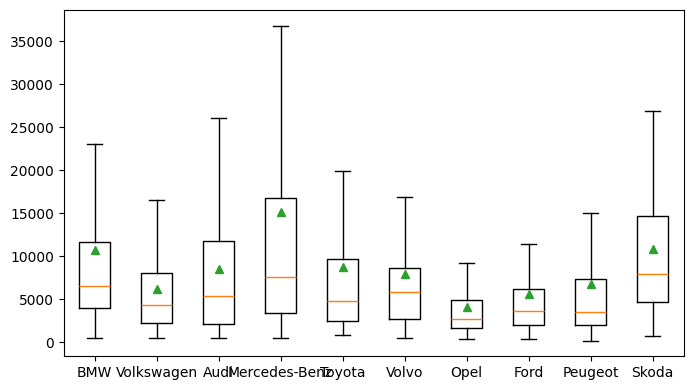

In [4]:
# Užduoties pirmoji dalis - duomenų gavimas:
# atrinkti 10 populiariausių gamintojų iš autopliuslt, 
# pateikti tokius stulpelius - gamintojas, vidutinė kaina, vidutinė rida, vidutinis amžius, modelių kiekis. 

DB = cnt.connect(
    host = '88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
)
C=DB.cursor()

sql="""
    SELECT gamintojas, count(*) n, GROUP_CONCAT(cast(replace(price,' ','') as float)) kainos
    FROM works.autopliuslt 
    GROUP BY gamintojas
    order by n desc limit 10;
"""
C.execute(sql)
ans = C.fetchall()
gamintojas, n, kainos = list(map(list, zip(*ans)))
# pout(ans)

#  numpy fromstring
kainosNP = [] # kainos numpy dvimačiame masyve
for i in kainos:
    skaiciai = np.fromstring(i, sep=',')
    kainosNP.append(skaiciai)
# print(kainosNP)

# boxplot:
fig, axis = plt.subplots(figsize=[8,4.5])
axis.boxplot(kainosNP, showmeans=True, showfliers=False)
axis.set_xticklabels(gamintojas)
plt.show()